In [2]:
from openbte.geometry import *
from openbte.solver import *
from openbte.material import *
from openbte.plot import *

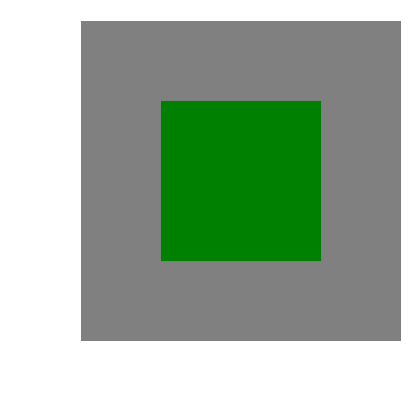

In [3]:
geo = Geometry(type = 'porous/square_lattice',shape='square',\
                                  lx = 10.0, ly = 10.0,\
                                  step=1.0,\
                                  porosity=0.25,\
                                  inclusion = True,
                                  mesh=True,plot=True);
#HTML('<style>{}</style>'.format(CSS))
 

In [4]:
Material(model='gray',n_theta = 16, n_phi = 48,region='Matrix',kappa = 150.0,filename='material_a');
Material(model='gray',n_theta = 16, n_phi = 48,region='Inclusion',kappa = 50.0,filename='material_b');

In [5]:
Solver(max_bte_iter = 0);

 
  ___                   ____ _____ _____ 
 / _ \ _ __   ___ _ __ | __ )_   _| ____|
| | | | '_ \ / _ \ '_ \|  _ \ | | |  _|  
| |_| | |_) |  __/ | | | |_) || | | |___ 
 \___/| .__/ \___|_| |_|____/ |_| |_____|
      |_|                                

Giuseppe Romano [romanog@mit.edu]
 
 
Elements:          262
Azimuthal angles:  16
Polar angles:      48
Mean-free-paths:   1
Degree-of-freedom: 201216
  
Matrix           150.00 W/m/K
Inclusion         50.00 W/m/K
  
Effective         38.45 W/m/K
  


In [ ]:
Plot(variable='map/fourier_flux',direction='magnitude',show=True,write=False,streamlines=True,repeat_x=3,repeat_y =3);
